David Guio Solano
Predicción de Enfermedad Cardiaca con Regresión Logística

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [334]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [336]:
# lectura de datos en Python y lo cargamos en la variable Datos
datos = pd.read_csv('./heart_cleveland_upload.csv')

In [338]:
# Realizamos lectura de los Datos para el análisis exploratorio
datos.head(200)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,61,0,3,130,330,0,2,169,0,0.0,0,0,0,1
196,61,1,3,140,207,0,2,138,1,1.9,0,1,2,1
197,61,1,3,148,203,0,0,161,0,0.0,0,1,2,1
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2,1


In [340]:
# Descripción de los datos
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos (Presion arterial en reposo)')

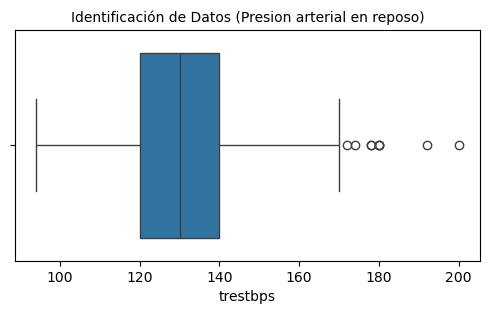

In [292]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['trestbps']) #indicamos que columna graficar
plt.title('Identificación de Datos (Presion arterial en reposo)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Frecuencia cardiaca maxima alcanzada)')

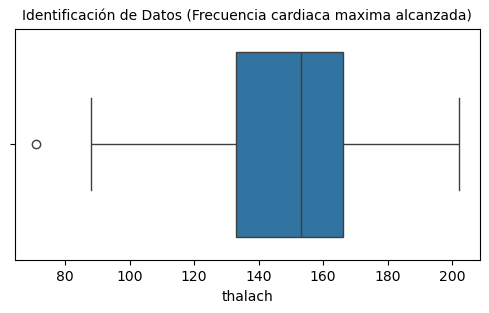

In [294]:
plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['thalach']) #indicamos que columna graficar
plt.title('Identificación de Datos (Frecuencia cardiaca maxima alcanzada)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Depresión del segmento ST inducida por el ejercicio en relación con el reposo)')

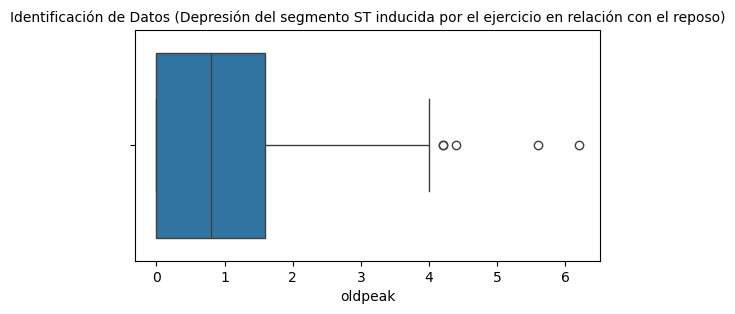

In [296]:
plt.figure(figsize=(6, 3)) #dimensión de la grafica
sns.boxplot(x=datos['oldpeak']) #indicamos que columna graficar
plt.title('Identificación de Datos (Depresión del segmento ST inducida por el ejercicio en relación con el reposo)', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos (Colesterol serico en mg/dl)')

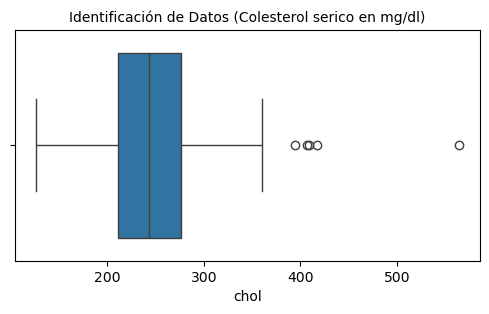

In [298]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=datos['chol'])
plt.title('Identificación de Datos (Colesterol serico en mg/dl)', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [342]:
#Revisión de datos faltantes

#para contar cuantos datos estan en cero
print("Cantidad de Registros con cero en Presion arterial en reposo: ",datos['trestbps'].isin([0]).sum()) 
print("Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada: ",datos['thalach'].isin([0]).sum())
#print("Cantidad de Registros con cero en Depresión del segmento ST inducida por el ejercicio en relación con el reposo: ",datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol serico en mg/dl: ",datos['chol'].isin([0]).sum())

Cantidad de Registros con cero en Presion arterial en reposo:  0
Cantidad de Registros con cero en Frecuencia cardiaca maxima alcanzada:  0
Cantidad de Registros con cero en Colesterol serico en mg/dl:  0


#No encontramos valores cero pero entonces si tenemos valores que estan fuera de lo normal que son los circulos blancos 
#fuera de la grafica en el punto anterior
#En este data set no encontramos valores en ceros o nulls ya que el datas set esta completo y que los datos manejan cero y unos
#Para saber en que categoria estan los pacientes 

In [344]:
#Conteo de Datos Atípicos

#Presion arterial en reposo
nivel_minimo=80
nivel_maximo=120
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 200


In [346]:
# Filtra Datos Atípicos

datos=datos[(datos['trestbps']<nivel_maximo)&(datos['trestbps']>nivel_minimo)]

In [348]:
# Validar si se removieron los datos atípicos

#Presion arterial en reposo
Total_Atipicos=((datos['trestbps']<nivel_minimo)|(datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [350]:
#Revisión del tipo de datos y datos faltantes
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 4 to 293
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        60 non-null     int64  
 1   sex        60 non-null     int64  
 2   cp         60 non-null     int64  
 3   trestbps   60 non-null     int64  
 4   chol       60 non-null     int64  
 5   fbs        60 non-null     int64  
 6   restecg    60 non-null     int64  
 7   thalach    60 non-null     int64  
 8   exang      60 non-null     int64  
 9   oldpeak    60 non-null     float64
 10  slope      60 non-null     int64  
 11  ca         60 non-null     int64  
 12  thal       60 non-null     int64  
 13  condition  60 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 7.0 KB


In [308]:
#Frecuencia acardiaca maxima alcanzada
nivel_minimo_FMC=60
nivel_maximo_FMC=100
Total_Atipicos_FCM=((datos['thalach']<nivel_minimo_FMC)|(datos['thalach']>nivel_maximo_FMC)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca es {}".format(Total_Atipicos_FCM))

El total de datos atípicos de la Frecuencia cardiaca es 60


In [310]:
datos=datos[(datos['thalach']<nivel_maximo_FMC)&(datos['thalach']>nivel_minimo_FMC)]

In [312]:
#Frecuencia acardiaca maxima alcanzada
Total_Atipicos_FCM=((datos['thalach']<nivel_minimo_FMC)|(datos['thalach']>nivel_maximo_FMC)).sum()
print("El total de datos atípicos de la Frecuencia cardiaca es {}".format(Total_Atipicos_FCM))

El total de datos atípicos de la Frecuencia cardiaca es 0


In [240]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


In [314]:
#Depresión del segmento ST inducida por el ejercicio en relación con el reposo

nivel_minimo_DS_ST=1
nivel_maximo_DS_ST=2
Total_Atipicos_DS_ST=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos del depresión del segmento ST es {}".format(Total_Atipicos_DS_ST))

El total de datos atípicos del depresión del segmento ST es 0


In [316]:
datos=datos[(datos['oldpeak']<nivel_maximo_DS_ST)&(datos['oldpeak']>nivel_minimo_DS_ST)]

In [317]:
#Depresión del segmento ST inducida por el ejercicio en relación con el reposo

Total_Atipicos_DS_ST=((datos['oldpeak']<nivel_minimo)|(datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos del depresión del segmento ST es {}".format(Total_Atipicos_DS_ST))

El total de datos atípicos del depresión del segmento ST es 0


In [320]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


In [322]:
#Colesterol serico en mg/dl
nivel_minimo_CS=50
nivel_maximo_CS=60
Total_Atipicos_CS=((datos['chol']<nivel_minimo_CS)|(datos['chol']>nivel_maximo_CS)).sum()
print("El total de datos atípicos del colesterol serico es {}".format(Total_Atipicos_CS))

El total de datos atípicos del colesterol serico es 0


In [324]:
datos=datos[(datos['chol']<nivel_maximo_CS)&(datos['chol']>nivel_minimo_CS)]

In [326]:
#Colesterol serico en mg/dl
Total_Atipicos_CS=((datos['chol']<nivel_minimo_CS)|(datos['chol']>nivel_maximo_CS)).sum()
print("El total de datos atípicos del colesterol serico es {}".format(Total_Atipicos_CS))

El total de datos atípicos del colesterol serico es 0


In [328]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      int64  
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      int64  
 6   restecg    0 non-null      int64  
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      int64  
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:

-trestbp osaber cuantaa persoaso tiene presion arterial en reposo sabiendo que e (ominimo=80 - maximo=12-
)-
Predir eccuantas personas estan en el promedio normal de la presión arterialtes

In [352]:
# Total de personas con presion arterial

datos['trestbps'].value_counts()

trestbps
110    19
112     9
118     7
108     6
100     4
105     3
115     3
102     2
94      2
101     1
106     1
117     1
114     1
104     1
Name: count, dtype: int64

In [356]:
datos[['trestbps']].head(200)

,trestbps
4,110
15,118
18,110
22,118
43,108
52,110
54,101
55,105
57,112
65,105


In [358]:
# Total de personas con Frecuencia cardiaca maxima alcanzada

datos['thalach'].value_counts()

thalach
160    4
156    3
143    3
158    3
126    3
168    2
154    2
179    2
140    2
122    2
132    2
172    2
125    2
142    2
153    2
118    1
148    1
159    1
185    1
147    1
108    1
177    1
169    1
181    1
161    1
144    1
149    1
175    1
152    1
190    1
123    1
167    1
165    1
151    1
130    1
192    1
138    1
174    1
114    1
Name: count, dtype: int64

In [360]:
datos[['thalach']].head(297)

,thalach
4,144
15,190
18,132
22,174
43,156
52,168
54,156
55,172
57,138
65,168


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [362]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [364]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
152   39    0   2        94   199    0        0      179      0      0.0   
15    52    1   0       118   186    0        2      190      0      0.0   
112   54    0   2       108   267    0        2      167      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
118   51    1   2       100   222    0        0      143      1      1.2   
94    60    0   2       102   318    0        0      160      0      0.0   
66    41    1   1       110   235    0        0      153      0      0.0   
156   71    0   3       112   149    0        0      125      0      1.6   
228   57    1   3       110   335    0        0      143      1      3.0   
222   58    1   3       100   234    0        0      156      0      0.1   
168   66    1   3       112   212    0        2      132      1      0.1   
65    41    0   1       105   198    0        0      168      0      0.0   
227   57    

In [366]:
print (Y_train)

152    0
15     0
112    0
163    1
118    0
94     0
66     0
156    0
228    1
222    1
168    1
65     0
227    0
284    0
78     0
246    1
215    0
79     0
280    1
22     0
98     1
290    1
73     0
270    1
278    0
247    1
109    0
271    0
133    1
99     0
265    0
165    0
287    0
256    0
148    0
57     0
55     0
275    0
257    1
181    1
281    1
213    1
137    0
291    1
173    1
Name: condition, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [368]:

# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [370]:
print (Y_test)

4      0
286    0
203    1
123    0
293    1
129    1
54     0
70     0
43     0
52     1
208    1
18     1
138    0
149    0
120    0
Name: condition, dtype: int64


In [372]:
print (Prediccion)

[0 0 1 1 0 1 0 0 0 0 1 0 0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [374]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

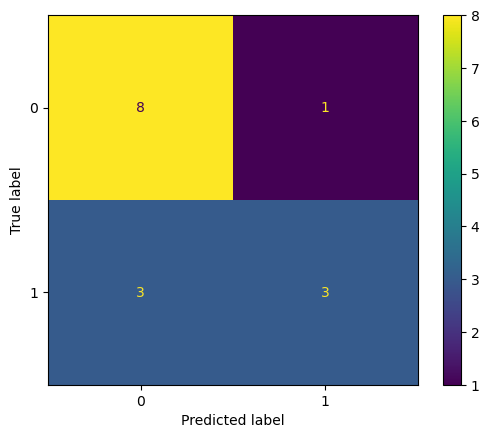

In [377]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

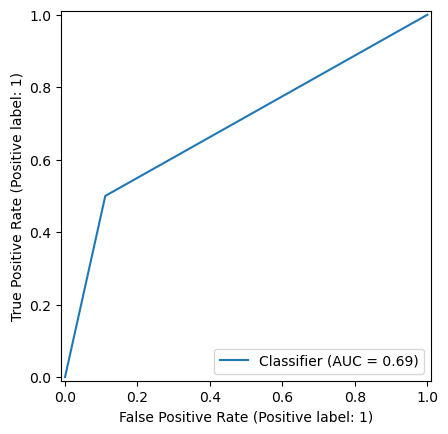

In [379]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [ ]:
Del desempeño del modelo se puede describir:

-Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo.
La precisión para la clase "condition" es 0,75 esto significa que el 75% de las personas cardiacas de cleveland son cardiacas.
-Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. 
la precisión para la clase "condition" es 0,50 esto significa que el modelo identificó correctamente al 50% de todos los cardiacos.
-F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall.
La presición para la clase "condition" es 0,60 lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

-Verdaderos negativos: lo que el clasificador en su gran mayoria correctamente como falso fue de 8
-Verdaderos positivos: lo que el clasificador en su gran mayoria correctamente como Verdadero 3
-Falsos positivos:lo que el clasificador en su gran mayoria incorrectamente como Verdaderas 1
-Falsos negativos: lo que el clasificador en su gran mayoria incorrectamente como como falso 3

De la curva de precisión del modelo se puede interpretar: 

-El AUC es 0,69 lo que significa que el 69 % de las predicciones son correctas los umbrales de clasificación.

8. Interpretar, analizar y documentar los resultados obtenidos